In [10]:
! swig -c++ -python swig/ising.i
! python swig/setup_ising.py build_ext --inplace

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def many_ising(L,N):
    J = 1.0
    T = 2
    H = 0.
    MCSteps = 1000
    i = ising.Ising(J, L, N, T, H)
    i.run(MCSteps)
    mvals = i.get_mvals()
    eAvgVal=i.get_eAvg() 
    mAvgVal=i.get_mAvg() 
    return mAvgVal

    

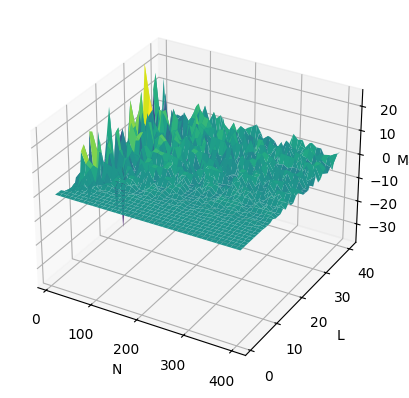

In [4]:
Lv=np.linspace(1,40, 40)
Nv=np.linspace(10, 400, 40)
N,L=np.meshgrid(Nv,Lv)
Z=np.zeros(N.shape)

for i in range(len(Lv)):
    for j in range(len(Nv)):
        Z[i,j]=many_ising((int(Lv[i])), (int(Nv[j])))

        
fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(N,L,Z, cmap="viridis")
ax.set_xlabel("N")
ax.set_ylabel("L")
ax.set_zlabel("Mavg")
plt.show()




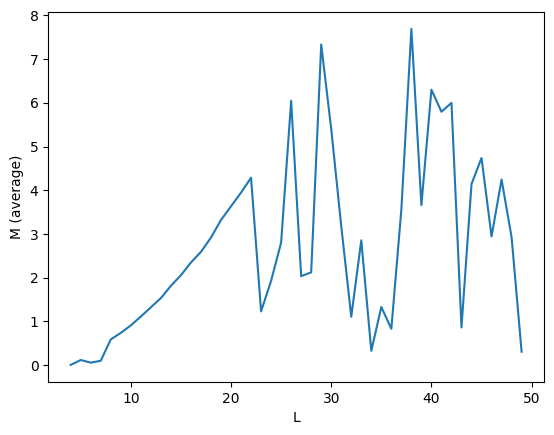

Text(0.5, 0, 'N')

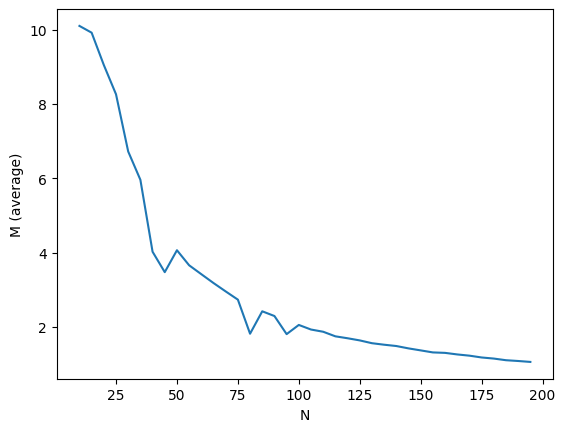

In [5]:
mAvgVals=[]
lVals=[]
N=100
for i in range(4, 50):
    mavgVal=many_ising(i, N)
    mAvgVals.append(mavgVal)
    lVals.append(i)

plt.plot(lVals, np.abs(mAvgVals))
plt.ylabel("M (average)")
plt.xlabel("L")
plt.show()
mAvgVals=[]
NVals=[]
L=15
for i in range(10, 200,5):
    mavgVal=many_ising(L, i)
    mAvgVals.append(mavgVal)
    NVals.append(i)

plt.plot(NVals, np.abs(mAvgVals))
plt.ylabel("M (average)")
plt.xlabel("N")

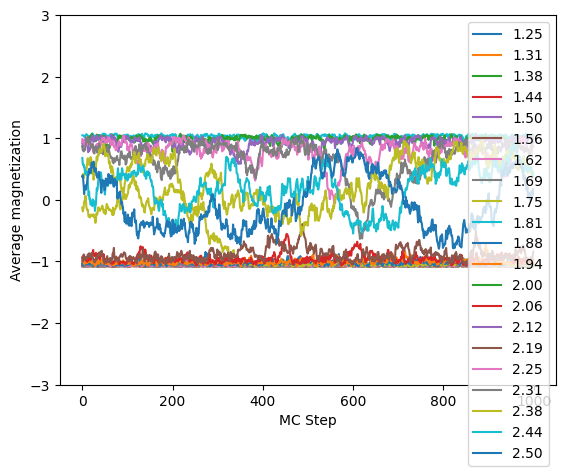

In [6]:
L = 18
J = 1.0
N = 300

H = 0
MCSteps=1000
eAvgVals = []
mAvgVals = []
Tvals = np.linspace(1.25,2.5,21)

for T in Tvals:
    i = ising.Ising(J, L, N, T, H)
    i.run(MCSteps)
    mvals = i.get_mvals()
    plt.plot(mvals, label="%3.2f" % (T))
    eAvgVals.append( i.get_eAvg() )
    mAvgVals.append( i.get_mAvg() )

plt.legend()
plt.ylim(-3,3)
plt.xlabel("MC Step")
plt.ylabel("Average magnetization")
plt.show()

Tc= 2.5000363368996608 B= 0.26313785081790986
Uncertainty of Tc= 0.0002895456065791692 Uncertainty of B= 0.04835517285670923


/tmp/ipykernel_14020/4177709005.py:6: RuntimeWarning: invalid value encountered in power
  return (Tc-T)**b


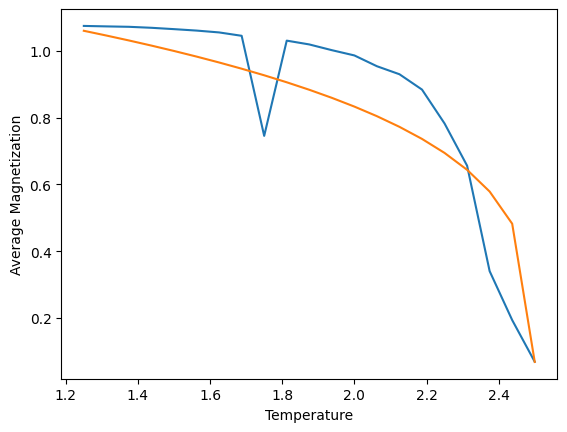

In [7]:
plt.plot(Tvals, np.abs(mAvgVals))
plt.xlabel("Temperature")
plt.ylabel("Average Magnetization")

def func(T, Tc, b):
    return (Tc-T)**b

popt, pcov=curve_fit(func, Tvals, np.abs(mAvgVals), [3, .4])
print("Tc=",popt[0], "B=",popt[1])
plt.plot(Tvals, func(Tvals,popt[0], popt[1]))
Tce,be=np.sqrt(np.diag(pcov))
print("Uncertainty of Tc=",Tce, "Uncertainty of B=",be)

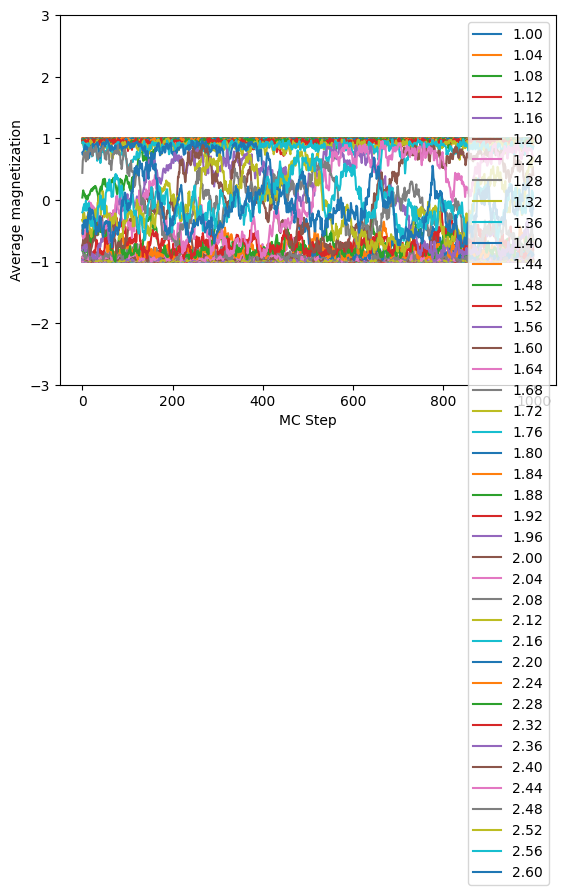

In [8]:
L = 15
J = 1.0
N = 225
T = 2
H = 0.

eAvgVals = []
mAvgVals = []
Tvals = np.linspace(1,2.6,41)

for T in Tvals:
    i = ising.Ising(J, L, N, T, H)
    i.run(MCSteps)
    mvals = i.get_mvals()
    plt.plot(mvals, label="%3.2f" % (T))
    eAvgVals.append( i.get_eAvg() )
    mAvgVals.append( i.get_mAvg() )

plt.legend()
plt.ylim(-3,3)
plt.xlabel("MC Step")
plt.ylabel("Average magnetization")
plt.show()

X= -2.065328032387697 Y= 2.0042303087019464 Z= 0.006187527152395559
Uncertainty in X= 0.013907617328960845 Uncertainty in Y= 0.08259760447193465 Uncertainty in Z= 0.0013399071231729699


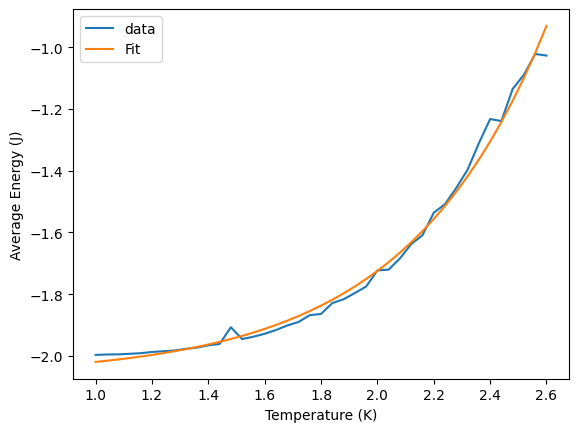

In [9]:
plt.plot(Tvals, (eAvgVals), label="data")
plt.xlabel("Temperature (K)")
plt.ylabel("Average Energy (J)")
def func2(T, x,y,z):
    return x+z*np.exp(y*T)

popt, pcov=curve_fit(func2, Tvals, (eAvgVals), [-1.5, .2, .1])
print("X=",popt[0], "Y=",popt[1], "Z=",popt[2])
xe,ye, ze=np.sqrt(np.diag(pcov))
print("Uncertainty in X=",xe,"Uncertainty in Y=", ye,"Uncertainty in Z=",ze)

plt.plot(Tvals, func2(Tvals, popt[0], popt[1], popt[2]), label="Fit")
plt.legend()